# Logistic Regression Task

## Import First Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load and Prepare the Dataset

In [7]:
# Load the dataset with a different encoding to handle potential encoding issues
file_path = 'C:/Users/DR. AGBARAJI/Documents/Facebook_Ads_2.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Removing non-numeric and non-essential columns
data_cleaned = data.drop(columns=['Names', 'emails'])

# Encoding categorical variables
label_encoder = LabelEncoder()
data_cleaned['Country'] = label_encoder.fit_transform(data_cleaned['Country'])

# Normalizing numerical variables
scaler = StandardScaler()
data_cleaned[['Time Spent on Site', 'Salary']] = scaler.fit_transform(data_cleaned[['Time Spent on Site', 'Salary']])

# Display the cleaned and prepared data
data_cleaned.head()

,Country,Time Spent on Site,Salary,Clicked
0,27,-0.799458,0.128258,0
1,17,-0.051029,1.378592,1
2,1,-1.316667,-0.621945,0
3,41,2.322233,-0.830444,1
4,26,0.146196,-0.819281,0


In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

In [10]:
# Splitting the data into features and target
X = data_cleaned.drop(columns=['Clicked'])
y = data_cleaned['Clicked']

In [11]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Apply Cross Validation (Using K-Fold)

In [12]:
import matplotlib.pyplot as plt

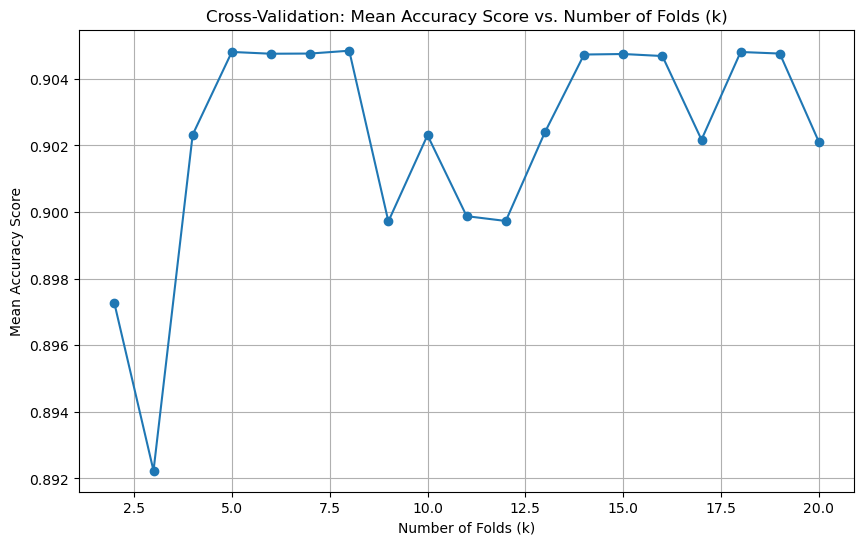

(8, 0.9048469387755103)

In [13]:
# Determining the best value for k in k-fold cross-validation
k_values = range(2, 21)
mean_accuracy_scores = []

for k in k_values:
    strat_k_fold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    model = LogisticRegression(random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='accuracy')
    mean_accuracy_scores.append(scores.mean())

# Plot the mean accuracy scores for each k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracy_scores, marker='o')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy Score')
plt.title('Cross-Validation: Mean Accuracy Score vs. Number of Folds (k)')
plt.grid(True)
plt.show()

# Determine the best k value
best_k = k_values[np.argmax(mean_accuracy_scores)]
best_k, max(mean_accuracy_scores)

## Train the Logistic Regression Model

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [15]:
# Train the logistic regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [16]:
# Predict on the test set
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

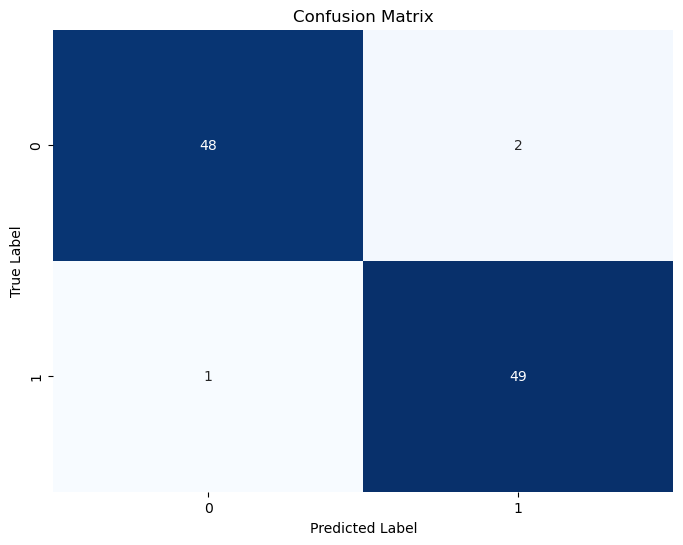

In [17]:
# Plot the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Display the Performance Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      0.98      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



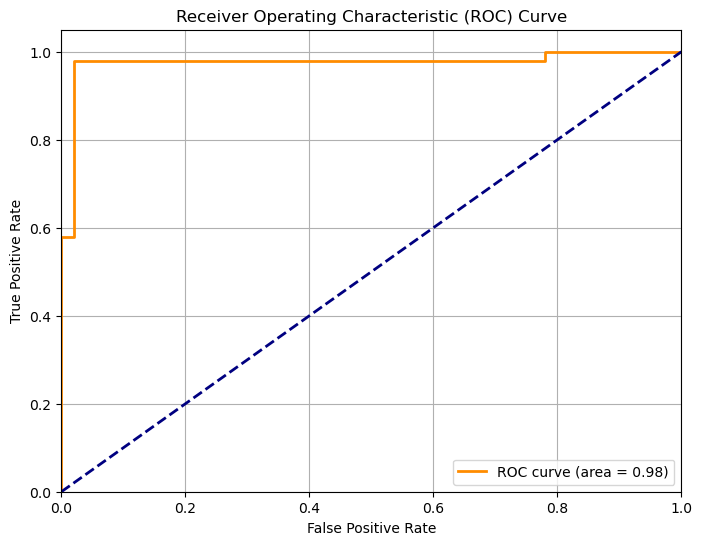

In [19]:
# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [20]:
# Evaluating the performance using different metrics
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics for Logistic Regression
evaluation_metrics_nb = {
    'Accuracy': accuracy_nb,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'F1 Score': f1_nb,
    'ROC AUC': roc_auc_nb
}

evaluation_metrics_nb

{'Accuracy': 0.97,
 'Precision': 0.9607843137254902,
 'Recall': 0.98,
 'F1 Score': 0.9702970297029702,
 'ROC AUC': 0.9763999999999999}

## Data Distribution Analysis

In [21]:
# Visualize the distribution of numerical variables
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

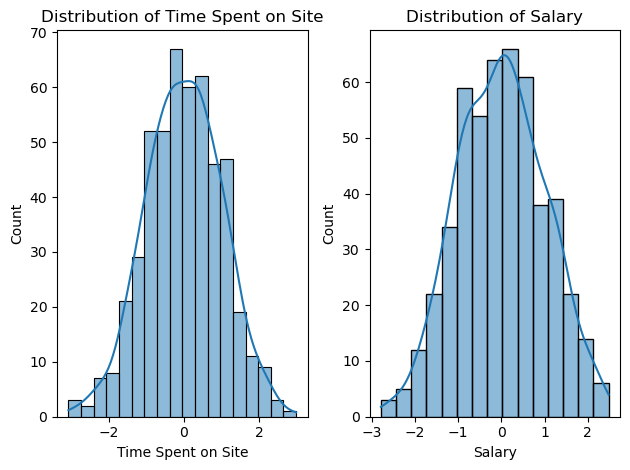

In [22]:
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Time Spent on Site'], kde=True)
plt.title('Distribution of Time Spent on Site')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['Salary'], kde=True)
plt.title('Distribution of Salary')

plt.tight_layout()
plt.show()


## Train a Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
# Training the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [25]:
# Predicting on the test set
y_pred_gnb = gnb_model.predict(X_test)
y_pred_proba_gnb = gnb_model.predict_proba(X_test)[:, 1]

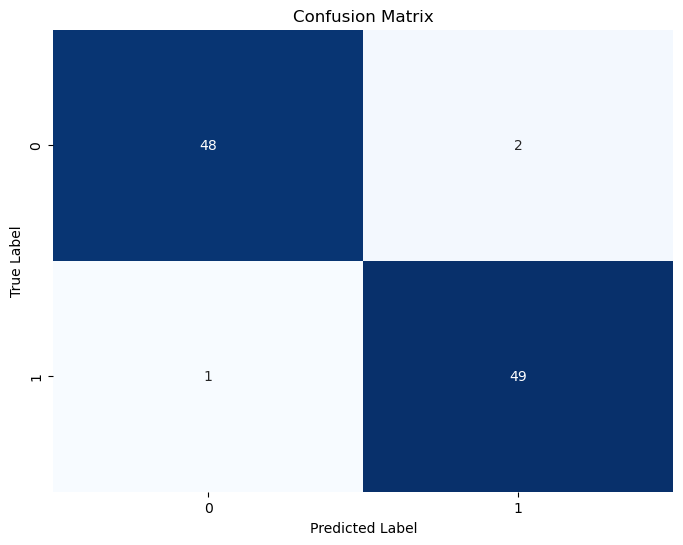

In [26]:
# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Display the Performance Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_gnb))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      0.98      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



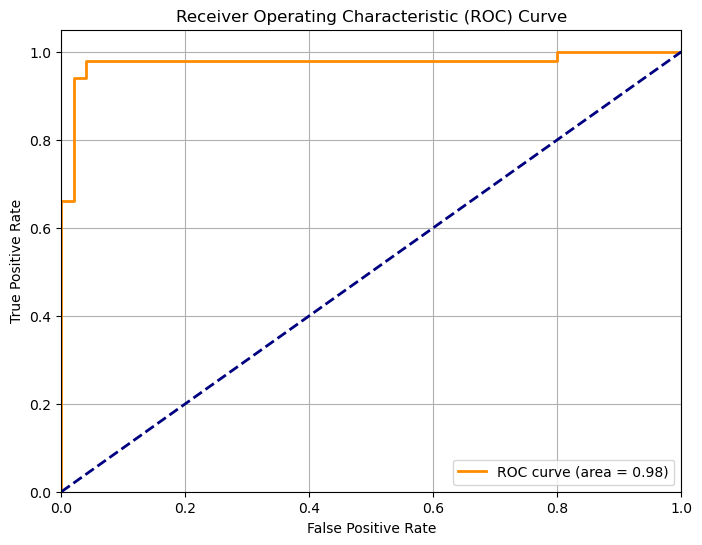

In [28]:
# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gnb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [29]:
# Evaluate the performance using different metrics
accuracy_nb = accuracy_score(y_test, y_pred_gnb)
precision_nb = precision_score(y_test, y_pred_gnb)
recall_nb = recall_score(y_test, y_pred_gnb)
f1_nb = f1_score(y_test, y_pred_gnb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_gnb)

# Print the evaluation metrics for Naive Bayes
evaluation_metrics_nb = {
    'Accuracy': accuracy_nb,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'F1 Score': f1_nb,
    'ROC AUC': roc_auc_nb
}

evaluation_metrics_nb

{'Accuracy': 0.97,
 'Precision': 0.9607843137254902,
 'Recall': 0.98,
 'F1 Score': 0.9702970297029702,
 'ROC AUC': 0.9768}